# <Font color = orange> Earth's Equilibrium Temperature and Climate Forcing </font>

 ## <font color = orange>Rowan Rexrode ||| Tup88296@temple.edu </font>

![image on the web](https://media.istockphoto.com/id/465119999/photo/graphic-illustration-of-the-earth-and-the-sun.jpg?s=612x612&w=0&k=20&c=qeSM-wX5n2zrdnMWadFgMOGdu9hwwegnJD2qpSSRxoQ=)

[Image source](https://www.istockphoto.com/photos/earth-sun)

### <font color =lightblue> Welcome! Here we will be analyzing the relationships between shortwave radiation, atmospheric emissivity, albedo and Earth's surface temperature. We will be learning about solar activity and the delicate nature of the forces balancing Earht's temperature.</font>

#### <font color =lightblue> Lets import the packages and load in the data we will be using throughout this notebook.</font>

In [1]:
import pandas as pd                          
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib import cm
from matplotlib import colormaps as colormap

In [2]:
ees_climate_dir = 'C:/Users/TU_Climate24_Student/Desktop/ees_climate/'
solar_constant_data = pd.read_csv("https://spot.colorado.edu/~koppg/TSI/Historical_TSI_Reconstruction.txt", skiprows=6, sep=' ').rename(columns={';':'year','Year':'NaN', 'Unnamed: 2':'NaN2', 'Unnamed: 3':'NaN3','TSI':'NaN4', '[W/m^2]':'TSI [W/m^2]'})
nasa_giss_data= pd.read_csv(ees_climate_dir+'unit2_rexrode/data/model_results/NASA_GISS_Response_To_Forcings.csv')
obs_temp=pd.read_csv(ees_climate_dir+'unit2_rexrode/data/model_results/Observed_Temps.csv')



<font color =lightblue> First, we must understand what we are going to be analysizing. Lets define total solar irradiance(TSI)! |||||||||||||||||</font>
<font color =orange>    The encyclopedia defines total solar irradiance as "the amount of radiant energy emitted by the sun over all wavelengths that fall each second on 11 sq ft (1 sq m) outside Earth’s atmosphere". In simpler terms, it is a measure of the total energy that reaches Earth's atmoshphere per unit area measured in (W/m^2). It used to be referred to as the solar constant but despite the implications that it is a steady value, it is known to vary over time. </font>
[Link to the source used to learn about TSI](https://earth.gsfc.nasa.gov/climate/projects/solar-irradiance/about)

<font color= lightblue> Let's get a better understanding of our data. Below we will calculate the mean and the magnitude of TSI found in our solar_constant_data. </font>

In [3]:
TSI_column=solar_constant_data['TSI [W/m^2]']
TSI_mean=TSI_column.mean()
TSI_mean

1360.9803982885085

In [4]:
TSI_magnitude=TSI_column.std()
TSI_magnitude

0.4736141972795096

<font color= lightblue> Our code produced a mean value of 1360.980 W/m^2 which is the same as the accepted value for the solar constant. It produced a value of 0.4736 W/m^2 for our standard deviation which tells us that TSI usually varies about 0.4736 W/m^2 per year. </font>

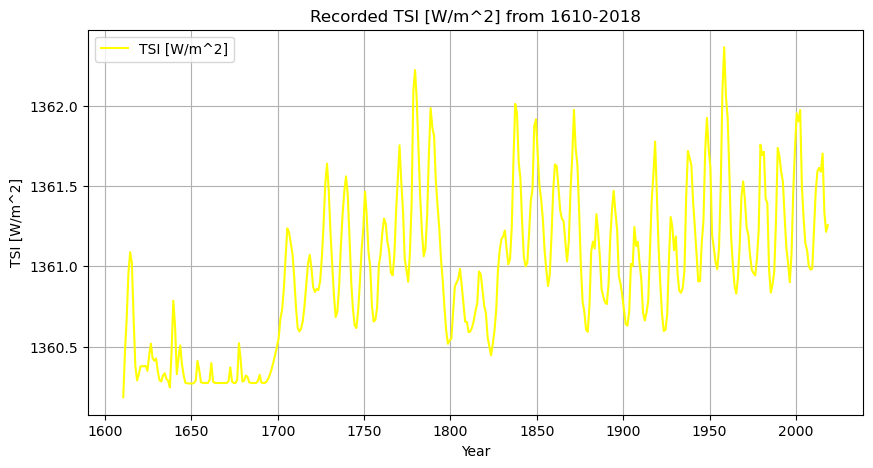

In [9]:
fig, ax= plt.subplots(figsize=(10,5))
ax.plot(solar_constant_data['year'],solar_constant_data['TSI [W/m^2]'],label='TSI [W/m^2]', color='yellow')
ax.set_title('Recorded TSI [W/m^2] from 1610-2018')
ax.set_xlabel('Year')
ax.set_ylabel('TSI [W/m^2]')
ax.legend()
ax.grid(True) 

 **Figure 1** Displays recorded TSI [W/m^2] from 1610 to 2018. 

<font color =orange> As we can see from our graph above, total solar irradiance varies greatly with respect to time. Research explains this variation as a result of the dark areas on the sun called <u>sun spots</u> and the bright areas surrounding sun spots called <u>faculae</u>.
[Link to the source used to learn about TSI variability](https://svs.gsfc.nasa.gov/10396/)

<font color = orange> Between the years of 1650-1715 there is a recorded drop in TSI [W/m^2] recorded. This period was called the Maunder Minimum, it can be visualized by the graph shown above. Let's calculate what Earth's surface air temperature would have been during this time period and compare it to the temperature dervived from the accepted solar constant value. </font>

In [10]:
#Below the code uses the .loc function to isolate the TSI [W/m^2] values between 1650-1715 in the 'year' column.
TSI_low=solar_constant_data.loc[(solar_constant_data['year']>=1650) & (solar_constant_data['year']<=1715),'TSI [W/m^2]']
TSI_low_mean=TSI_low.mean()
TSI_low_mean


1360.4342584615385

In [11]:
#This code assigns necessary values to variable we will use to calculate Earth's surface temperature. 
earth_rad =  6378137              # Earth's radius in meters
sun_rad = 696000000               # Sun's radius in meters
d_earth =  149600000000           # Distance of the Earth from the Sun in meters
sigma = 5.67e-8                   # Stefan-Boltzman constant W⋅m−2⋅K−4
epsilon = 1                       # Emissivity for a blackbody - unitliess
T_sun =  5778                     # Sun's average surface temperature in Kelvin
alpha= 0.3                        #Earth's albedo

In [12]:
#Calculate the temperature of Earth's surface during the Maunder Minimum
T_earth_low = (((1-alpha)*TSI_low_mean*np.pi*earth_rad**2)/(4*np.pi*earth_rad**2*sigma))**(1/4)
T_earth_low

254.5558824139783

In [13]:
#Converts the value above from Kelvin to Celcius
T_earthlow_C=T_earth_low-273.15
T_earthlow_C

-18.594117586021667

In [25]:
#Calculates the temperature of Earth's surface from the accepted Solar constant value
T_earth = (((1-alpha)*TSI_mean*np.pi*earth_rad**2)/(4*np.pi*earth_rad**2*sigma))**(1/4)
T_earth

254.58142612930314

In [15]:
#Converts the value above from Kelvin to Celcius
T_earth_C=T_earth-273.15
T_earth_C

-18.568573870696838

In [16]:
#Calculate the temperature drop
T_earth_C-T_earthlow_C

0.025543715324829463

In [24]:
#Calculate the standard deviation between temperatures in the Maunder Minimum
Maunder_temps=(((1-alpha)*TSI_low*np.pi*earth_rad**2)/(4*np.pi*earth_rad**2*sigma))**(1/4)
Maunder_temps_std=Maunder_temps.std()
Maunder_temps_std



0.01217589150794594

<font color=lightblue> In the code above we determined that the average surface air temperature of Earth during the Maunder Minimum was -18.59 degrees celcius and the average temperature dervived from the accepted solar constant was -18.56 degrees celcius. This means there is about a 0.26 degree celcius difference between the two temperature values. 

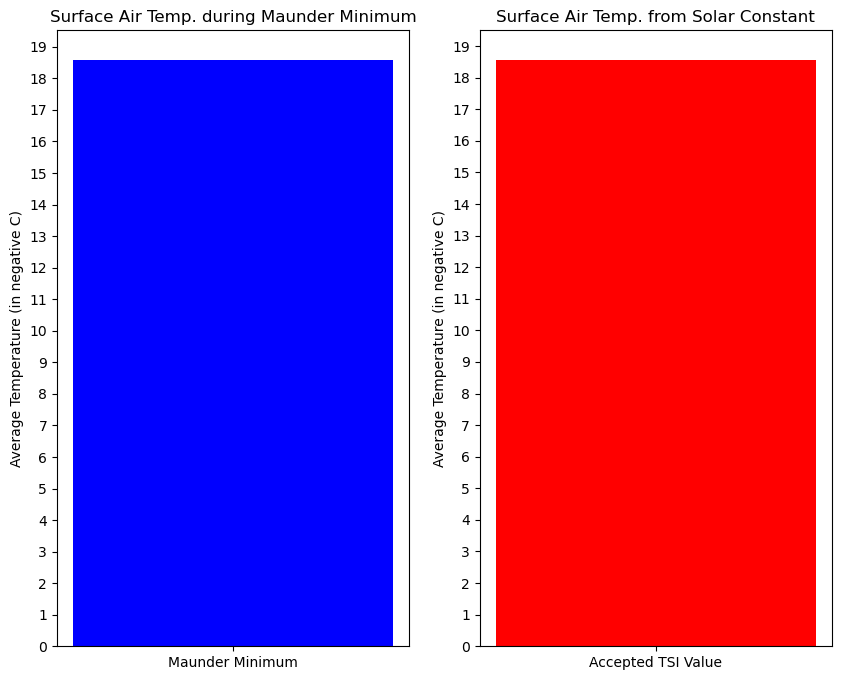

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))
ax1.bar('Maunder Minimum', abs(T_earthlow_C), color='blue')
ax1.set_ylabel('Average Temperature (in negative C)')
ax1.set_title('Surface Air Temp. during Maunder Minimum')
ax1.set_yticks(np.arange(0,20,1))
ax2.bar('Accepted TSI Value', abs(T_earth_C), color='red')
ax2.set_ylabel('Average Temperature (in negative C)')
ax2.set_title('Surface Air Temp. from Solar Constant')
ax2.set_yticks(np.arange(0,20,1))
plt.show()                              


**Figure 2** Bar graph comparison of the average surface air temperature calculate during the Maunder Minimum and the average surface air temperature calculated from the accepted TSI Value (Solar Constant)

|Solar Irradiance (Maunder Minimum)(W/m^2)|Temperature Earth (Maunder Minimum)(W/m^2)|
|---|---|
|Mean=1360.4342584615385|Mean=-18.594117586021667|
|Std=0.2603218770173773|Std=0.01217589150794594|

**Figure 3** The variability amounts to a negligible difference in temperature due to the lowered TSI values during the Maunder Minimum.

<font color ='lightblue'> Now let's explore other uses of our code to learn more about the role of albedo in Earth's climate system.</font>

In [33]:
#This is the formula from above we used to calculate temperature from albedo and TSI. 
##As it is currently it uses the accepted albedo value 0.3 (alpha) as the albedo factor
###Now lets change the albedo to see how temperature changes. 

#Lower albedo
Temps=(((1-alpha)*TSI_mean*np.pi*earth_rad**2)/(4*np.pi*earth_rad**2*sigma))**(1/4)
Low_albedo_temps=(((1-0.1)*TSI_mean*np.pi*earth_rad**2)/(4*np.pi*earth_rad**2*sigma))**(1/4)
Low_albedo_temps_C=Albedo_temps-273.15

#Higher albedo
High_albedo_temps=(((1-0.8)*TSI_mean*np.pi*earth_rad**2)/(4*np.pi*earth_rad**2*sigma))**(1/4)
High_albedo_temps_C=High_albedo_temps-273.15


print("Remember, our original calculated average surface air temperature was",T_earth_C,"with albedo lowered from 0.3 to 0.1 temperature is", Low_albedo_temps_C,"with albedo raised to 0.8 temperature is  ", High_albedo_temps_C,".") 


Remember, our original calculated average surface air temperature was -18.568573870696838 with albedo lowered from 0.3 to 0.1 temperature is -2.0604152226047177 with albedo raised to 0.8 temperature is   -87.02286007336602 .


<font color='lightblue'> Now let's explore our equation to understand how an increase or decrease in the emissivity parameter would effect the system.</font>

In [34]:
#The emissivity parameter for a blackbody is 1. It is the 1 in the (1-alpha) part of our code.

#Lower emissivity parameter 
Low_emiss_temp=(((0.5-alpha)*TSI_mean*np.pi*earth_rad**2)/(4*np.pi*earth_rad**2*sigma))**(1/4)
Low_emiss_temp_C=Low_emiss_temp-273.15

#Higher emissivity parameter
High_emiss_temp=(((2-alpha)*TSI_mean*np.pi*earth_rad**2)/(4*np.pi*earth_rad**2*sigma))**(1/4)
High_emiss_temp_C=High_emiss_temp-273.15

print("Remember, our original calculated average surface air temperature was",T_earth_C,"with a lower emissivity parameter temperature is",Low_emiss_temp_C,"with a higher emissivity parameter temperature is",High_emiss_temp_C,".")


Remember, our original calculated average surface air temperature was -18.568573870696838 with a lower emissivity parameter temperature is -87.02286007336599 with a higher emissivity parameter temperature is 44.65771467744514 .


<font color ='lightblue'> Through our experimenting with our formula we learned that albedo and the emissivity parameter inversely affect Earth's surface air temperature. A higher albedo makes temperature lower, which makes sense because it would indicate that more energy is being reflected from Earth. The emissivity parameter for a perfect emitter is a 1, a perfect reflector has an emissivity of 0. When we raised the emissivity temperature increased. It is found that material changes emissivity. Tin foil has a lower emissivity than soil. Urbanization, which leads to an increase in concrete and other unnatural surfaces, could also lead to a higher emissivity parameter. 

<function matplotlib.pyplot.show(close=None, block=None)>

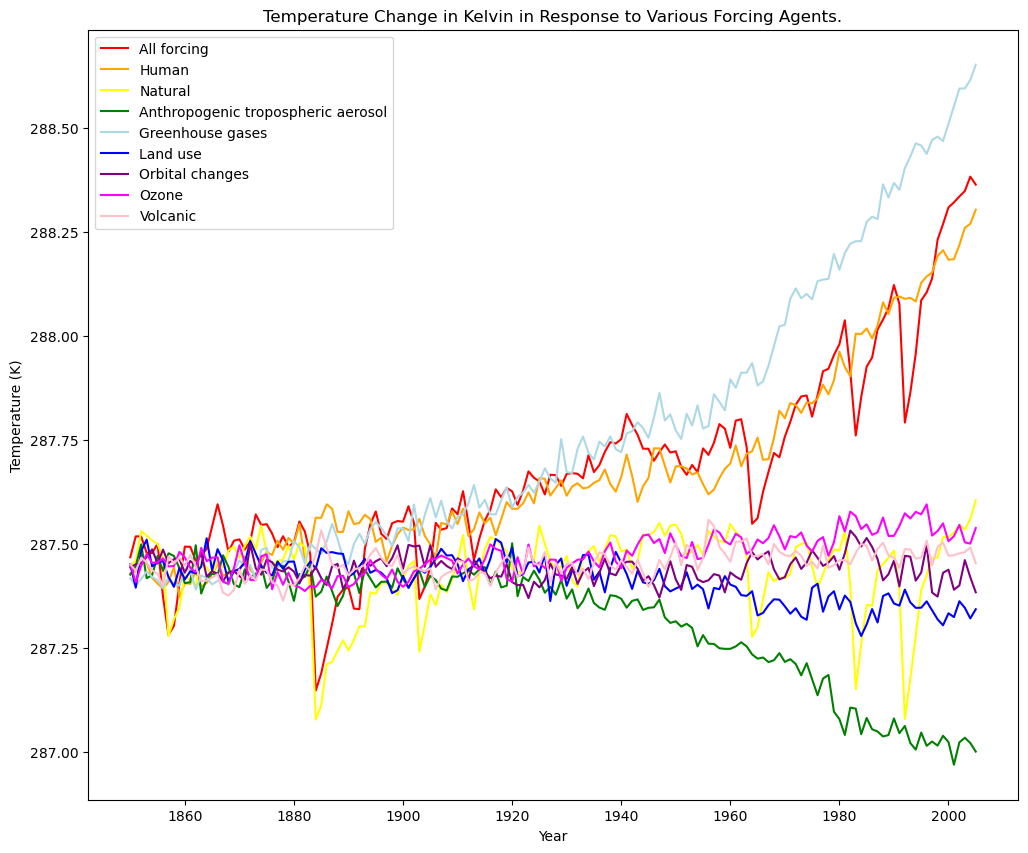

In [54]:
#Call and label the proper columns for use.
All=nasa_giss_data["All forcings"]
Human=nasa_giss_data["Human"]
Natural=nasa_giss_data["Natural"]
Anthro=nasa_giss_data["Anthropogenic tropospheric aerosol"]
Green=nasa_giss_data["Greenhouse gases"]
Land=nasa_giss_data["Land use"]
Orb=nasa_giss_data["Orbital changes"]
Ozone=nasa_giss_data["Ozone"]
Solar=nasa_giss_data["Solar"]
Volcanic=nasa_giss_data["Volcanic"]
Year=nasa_giss_data["Year"]

#Create the figure the graph will go on
plt.figure(figsize=(12, 10)) 

#Plot each line
plt.plot(Year, All, label="All forcing", color='red')
plt.plot(Year, Human, label="Human", color="orange")
plt.plot(Year, Natural, label="Natural", color="yellow")
plt.plot(Year, Anthro, label="Anthropogenic tropospheric aerosol", color="green")
plt.plot(Year, Green, label="Greenhouse gases", color="lightblue")
plt.plot(Year, Land, label="Land use", color="blue")
plt.plot(Year, Orb, label="Orbital changes", color="purple")
plt.plot(Year, Ozone, label="Ozone", color="magenta")
plt.plot(Year, Solar, label="Volcanic", color="pink")

#Labels and legend
plt.xlabel("Year")
plt.ylabel("Temperature (K)")
plt.title("Temperature Change in Kelvin in Response to Various Forcing Agents.")
plt.legend()

plt.show

**Figure 4** The graph above shows the affect various forcing agents have on Earth's average surface air temperature thoughout the years. 

<font color ="lightblue"> The **natural** line shows that is trending downwards and this is because the recorded solar and volcanic activity of our time is actually thought to be having a cooling affect on Earth. This is also why the **volcanic** line trends flat with some dips. **Anthroporgenic tropospheric aerosol** actually reflect incoming solar radiation hence why temperature trends downward with their influence. **Ozone** changes have have caused a very minute increase, thought to only be about a few tenths of a degree. Our **land usage** is thought to have a net cooling affect due to actions like replacing a forest with a field. A field has a higher reflectivity than a forest. **Human** forcings allign with the observed warming of the planet. It is thought that between about 103% of warming since 1850 is from humans. It is over a hundred percent because scientists calulcate that naturally the planet would actually be a bit cooler due to solar and volcanic activity. **Greenhouse gases** are known to have been increased due to human activity and also lead to a warming due to their ability to retain and trap heat. It is clear that the observed warming is a result of human interaction and can be visualize by our graph. If all the natural forcing agents temperature values were averaged and plotted it would be a line with a small slope and, possibly, a negative slope. However when you observe the temperature in relation to human forcing agents the slope steepens drastically in the positive direction. [Link to the source to learn about forcing agents](https://www.carbonbrief.org/analysis-why-scientists-think-100-of-global-warming-is-due-to-humans/) 

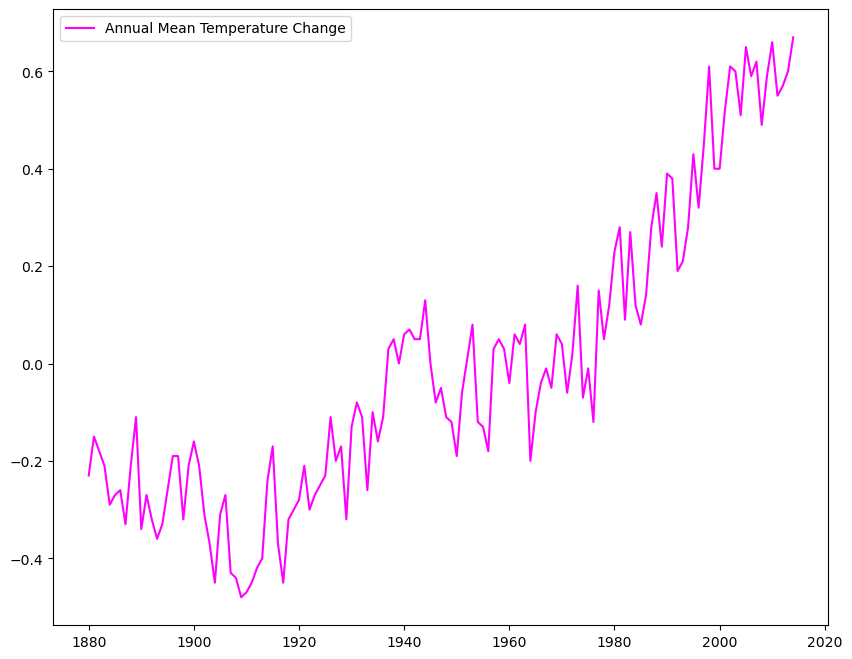

In [55]:
Year=obs_temp["Year"]
Temp=obs_temp["Annual_Mean"]
plt.figure(figsize=(10,8))
plt.plot(Year,Temp, label="Annual Mean Temperature Change", color="magenta")
plt.legend()

plt.show()


**Figure 5** Above is a graph of the annual mean increase in temperature. 

<font color= 'lightblue'> If we compare figure 5 to figure 4 we can further see the correlation between annual mean temperature change and human activity on temperature. The lines plotted for both annual mean temperature change and human forcing agents follow this same pattern. Relativly stable til 1940 where there is a jump, the a slight decrease again, and then a dramatic upwards sloping up til the 2020s. 

<font color='lightblue'> We learned a lot throughout this notebook! We learned what total solar irradience is, how it has fluctuated throughout the years and how it affects temperature. Then we analyzed the Maunder Minimum period to further understand TSI and it's affect on temperature. We changed our albedo and emissivity parameters to discover that a higher albedo = lower temperatures and a higher emissivity = higher temperatures. Then we examined various forcing agents and their affect on climate. All leading to the determination that human influence has the most significant affect on climate. We futher corroberated this through the comparison of temperature change due to human activity with the graph of annumal mean temperature change. To some it may be scary that human influence has such a massive impact on surface temperatures, however, with that knowledge we can hopefully change our behavior to mitigate further affects. Thanks for learning with me.</font>